# Response Themes for "What needs in your workflow does Jupyter Notebook address?"

* Goal: Extract theme keywords from `workflow_needs_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Strawman process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.workflow_needs_addressed_1, df.workflow_needs_addressed_2, df.workflow_needs_addressed_3])

In [9]:
assert len(responses) == len(df) * 3

For later ref, to keep the notebook code generic for other questions.

In [10]:
column = 'workflow_needs_addressed'

In [11]:
responses.isnull().value_counts()

True     3565
False    1553
dtype: int64

In [12]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 5 times and manually built up the initial set of keywords seen commonly across them. This time, I did not form groupings. The keywords felt sufficient on their own to describe what needs Jupyter was satisfying.

In [13]:
show(responses.sample(20, random_state=rs))

0) Data Science

1) writing documentation

2) Integration of code, maths and viz

3) Convenient way to access docstrings and inspect live objects.

4) visual

5) Easy integration of markdown + python

6) Carrying out classification of large datasets

7) Presenting findings

8) visualisation and persistence of results

9) Document a library

10) Exploration

11) No-install Python experimenting environment

12) network access

13) viz needs

14) Exploration of data

15) quick analysis of experimental data

16) Lecture note presentation tool w/live coding

17) Share and illustrate code with less technical, or less Pythonised colleagues

18) Code prototyping

19) prototyping code



In [14]:
themes = {
    'needs_addressed': ['data science', 'documentation', 'integration', 'live', 'visual', 'classfication', 'present', 
                        'visuali(s|z)', 'document', 'explor', 'install', 'network', 'viz', 'experiment', 'python', 
                        'document', 'network', 'viz', 'quick', 'share', 'illustrate', 'prototyp', 'trying out', 
                        'organization', 'writing',  'simulations', 'interactive', 'portabl',
                        'charts', 'multi', 'parsing', 'graph', 'mixing', 'debug', 'test', 
                        'showcase', 'explain', 'report', 'reproduc',
                        'one-?off', 'publish', 'analy(s|z)', 'hack', 'iterat', 'early', 'teach', 
                        'repeat', 'ideas', 'captur',
                        'instruct', 'shell', 'educat', 'notes', 'troubleshoot', 'agil(ity|e)']
}

## Coverage Improvement

I next ran the code below to improve the number of responses covered by the keywords. I iterated here to drive down the number of responses without any keywords identified.

In [15]:
import re

In [16]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [17]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [18]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

needs_addressed 1059


1    1059
0     494
Name: themes, dtype: int64

In [19]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
738,Data processing and cleaning,
1432,Sharing of results,
1609,sharing processing steps,
1431,Persistent - I can leave a notebook running on the server and return to it days later where I left off,
428,Persistent calculation results per cell,
759,interactivity,
1114,fast editing,
894,The ability to use different languges,
1247,Easy to see results,
1668,computational notebook,


In [20]:
themes = {
    'needs_addressed' : ['data science', 'documentation', 'integration', 'live', 'visual', 'classfication', 'present', 
    'document', 'explor', 'install', 'network', 'viz', 'experiment', 'python', 'document', 'network', 'viz', 'quick',
    'shar(e|ing)', 'illustrate', 'prototyp', 'trying out', 'organization', 'writing', 'simulations', 'interact', 
    'portab(le|ility)', 'chart', 'multi', 'parsing', 'graph', 'mixing', 'debug', 'test', 'showcase',  
    'one-?off', 'publi(sh|cation)', 'analy(s|z)', 'hack', 'iterat', 'early', 'teach', 'repeat', 'ideas', 'captur',
    'instruct', 'shell', 'educat', 'note', 'troubleshoot', 'agil(ity|e)', 'communic', 'research', 'scratchpad',
    'increment', 'munging', 'remote', 'persist', 'literate', 'descrip', 'language', 'grading', 'plot', 'cloud',
    'big', 'spark', 'fast', 'excel', 'spreadsheet', 'visibl', 'markdown', 'repl', 'try', 'snippet', 'script',
    'cleans?', 'database', 'widget', 'anywhere', 'database', 'concept', 'simulation', 'intermediate', 'format',
    'develop', 'comput(ation|ing)', 'history', 'learning', 'excel', 'spreadsheet', 'draft', 'glue', 'together', 
    'show others', 'sandbox', 'tables', 'collab', 'workflow', 'story', 'poc', 'ide($|\W)', 'study', 'instant', 
    'tutorial', 'understand', 'combin(e|ing)', 'eas(y|e|ier|ily)', 'friendly', 'sanitiz', 'figure', 'cell', 'terminal', 
    'classroom', 'tweak', 'analytic', 'large', 'big', 'show code', 'image', 'data', 'playbook', 'automat', 
    'visuali(s|z)', 'report', 'reproduc', 'exercise', 'adoption', 'model', 'expla(in|nation)', 'demo', 'other people',
    'play', 'math', 'simpl(e|icity)', 'deploy', 'open source', 'dissem']
}

In [21]:
tagged = tag_themes(responses, themes)

needs_addressed 1475


## Keyword Frequencies

Finally, I plotted the frequency counts of keywords identified.

In [22]:
import matplotlib
import seaborn

In [23]:
counts = {}

In [24]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [25]:
hist = pd.Series(counts).sort_values()

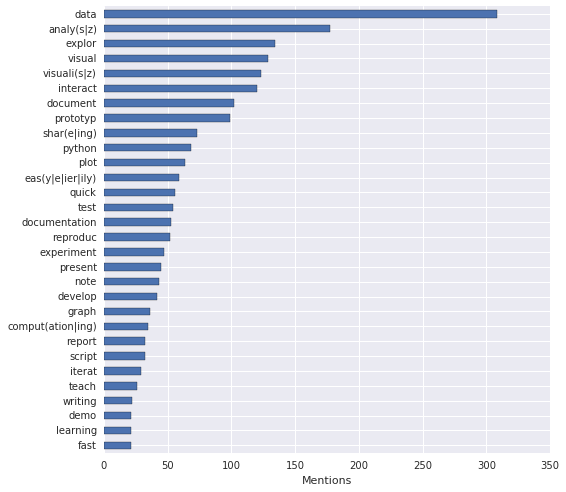

In [26]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

In [27]:
hits = responses.map(lambda text: keywords_or(text, ['visuali(s|z)']))

In [28]:
responses[hits]

103                                                                                             data visualization
157                                                                                           inline visualization
179                                                                                                  visualisation
264                                                  simple to use interactive visualization via bokeh and plot.ly
278                                                         python scripting and publishing incl js visualisations
303                                               Integrating text, mathematical formulas, code and visualizations
358                                                                                                  visualisation
406                                                                                             Data visualization
425                                                                    The need 

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [29]:
themes_df = tagged.themes.to_frame()

In [30]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [31]:
themes_df[column+'_keywords'] = ''

In [32]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [33]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [34]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(theme for theme in themes if theme)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keyword for keyword in keywords if keyword)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [35]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [36]:
themes_df.head(5)

,workflow_needs_addressed_themes,workflow_needs_addressed_keywords
1,needs_addressed,"prototyp,interact,widget,plot"
5,needs_addressed,"analy(s|z),visual,data,visuali(s|z)"
6,needs_addressed,"documentation,explor,model,document,shar(e|ing),analy(s|z),simulation"
7,needs_addressed,"visual,writing,data,analy(s|z),visuali(s|z),report"
9,needs_addressed,"deploy,python"


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [37]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [38]:
themes_df.to_csv(column + '_themes.csv', sep=';')